### Building Dog vs Cat Classifier

In [1]:
import numpy as np
import os 
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Flatten,MaxPool2D,Conv2D,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model,load_model
import shutil
import random 
import matplotlib.pyplot as plt

In [2]:
train_path=os.path.abspath(r"C:\Users\shash\notebooks\project kaggale\dog vs cats\datasets\sub_data\train")
validation_path=os.path.abspath(r"C:\Users\shash\notebooks\project kaggale\dog vs cats\datasets\sub_data\validation")

### Data preproccessing

In [3]:
train_data_gen=ImageDataGenerator(rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,)

train_generator=train_data_gen.flow_from_directory(train_path,class_mode='binary',batch_size=100,target_size=(150,150))

validation_data_gen=ImageDataGenerator(rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,)

validation_generator=validation_data_gen.flow_from_directory(validation_path,class_mode='binary',batch_size=100,target_size=(150,150))

Found 5000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
pretrained_model=InceptionV3(input_shape=(150,150,3),include_top=False)
for layer in pretrained_model.layers:
    layer.trainable=False
    
last_output=pretrained_model.get_layer('mixed7').output

x=Conv2D(16,3,padding='same',activation='relu')(last_output)
x=MaxPool2D(2)(x)
x=Conv2D(34,3,padding='same',activation='relu')(x)
x=MaxPool2D(2)(x)

x=Flatten()(x)

x=Dense(512,activation='relu')(x)
x=Dropout(0.3)(x)

x=Dense(1,activation='sigmoid')(x)

model=Model(pretrained_model.input,x)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [6]:
file_path='model1.hdf5'
my_check=ModelCheckpoint(file_path,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True)

In [13]:
#model.fit_generator(train_generator,validation_data=validation_generator,epochs=8,callbacks=[my_check])

Epoch 1/8
50/50 [==============================] - 355s 7s/step - loss: 0.4533 - accuracy: 0.7784 - val_loss: 0.4351 - val_accuracy: 0.8450
Epoch 2/8
50/50 [==============================] - 353s 7s/step - loss: 0.3303 - accuracy: 0.8558 - val_loss: 0.3965 - val_accuracy: 0.8610
Epoch 3/8
50/50 [==============================] - 353s 7s/step - loss: 0.2951 - accuracy: 0.8730 - val_loss: 0.4727 - val_accuracy: 0.8770
Epoch 4/8
50/50 [==============================] - 362s 7s/step - loss: 0.2813 - accuracy: 0.8756 - val_loss: 0.4349 - val_accuracy: 0.8780
Epoch 5/8
50/50 [==============================] - 353s 7s/step - loss: 0.2662 - accuracy: 0.8826 - val_loss: 0.5059 - val_accuracy: 0.8710
Epoch 6/8
50/50 [==============================] - 353s 7s/step - loss: 0.2458 - accuracy: 0.8968 - val_loss: 0.4101 - val_accuracy: 0.8950
Epoch 7/8
50/50 [==============================] - 398s 8s/step - loss: 0.2512 - accuracy: 0.8902 - val_loss: 0.4409 - val_accuracy: 0.8650
Epoch 8/8
50/50 [===

In [16]:
#model.load_weights(file_path)

In [7]:
model=load_model(file_path)

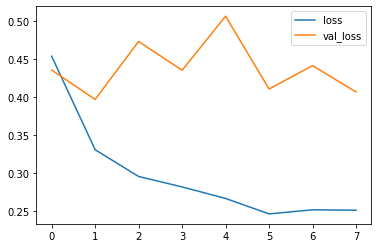

In [18]:
import pandas as pd
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

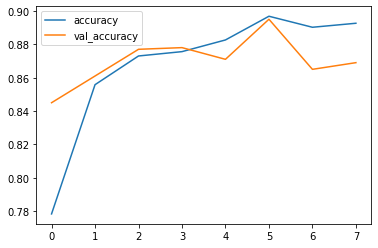

In [19]:
pd.DataFrame(model.history.history)[['accuracy','val_accuracy']].plot()

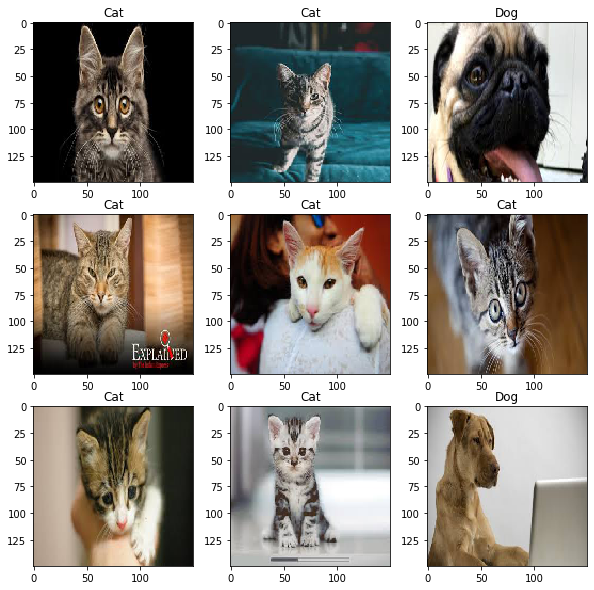

In [9]:
test_path=os.path.abspath(r"C:\Users\shash\notebooks\project kaggale\dog vs cats\datasets\all_data\test\all")

test_files=os.listdir(test_path)
choosen_file=random.sample(test_files,len(test_files))[:9]
row=3
col=3
i=0
plt.figure(figsize=(10,10))
for file in choosen_file:
    img=load_img(os.path.join(test_path,file),target_size=(150,150))

    data=np.asarray(img,dtype=float).reshape(1,150,150,3)/255

    t=model.predict(data)
    i=i+1
    plt.subplot(row,col,i)
    if t<0.5:
        plt.imshow(np.asarray(img))
        plt.title('Cat')
    else:
        plt.imshow(np.asarray(img))
        plt.title('Dog')
plt.show()   